# ARIM情報活用講座：　ケモインフォマテックス応用編　
# 第1回：　分子記述子

## 底本
船津 公人、柴山 翔二郎 **『実践 マテリアルズインフォマティクス　Pythonによる材料設計のための機械学習』**、近代科学社、2020  
第１章　1.2　数値データ可視化　－探索的データ解析ー  
　　　　1.4　化合物構造の可視化  
第５章　記述子計算

## 本編の目標
分子記述子は、分子の類似性の計算や分類、回帰、クラスタリング、バーチャルスクリーニングなど、さまざまな化学情報処理に使用されます。また機械学習モデルの学習において、分子の特徴ベクトルとして入力されることもあります。本編では、その代表的な記述子としてRDKitに実装されている

1. **Morganフィンガープリント　（ECFP）**
1. **RDKitフィンガープリント　（Daylight Fingerprint）**
1. **RDKit記述子**

の３つの記述子について学びます。

## 分子記述子とは

分子記述子(**molecular descriptors**)とは、分子の構造と物理的・化学的な特性の関係を数値化するための数値特徴量を指します。たとえば、実験で測定した分子量、溶解度、融点、沸点などは分子記述子の代表的な事例です。単に記述子（**ディスクリプター**）とも称されることもあります。

加えて、分子骨格の有無や部分構造（**フラグメント**）の数など分子の構造的特徴を数値化した指標も分子記述子になります。  

分子記述子は次の2つに大別されます。

* **実験実測値**：　分配係数（LogP）、モル屈折率、双極子モーメント、分極率などの物性値（測定値）
* **理論分子記述子**：　分子骨格の有無や部分構造（フラグメント）などの分子の記号的表現


| 次元| 表現| 
| :----------------| :----------------|
| 0次元| 原子タイプ、結合様式など| 
| 1次元| 原子タイプの数、水素結合ドナーやアクセプターの数、環の数、タイプ別の官能基の数、分子フィンガープリントなど |
| 2次元| グラフ理論や計算された値による数学的表現など   |
| 3次元| 幾何学的記述子、極性表面積、3D-MoRSE記述子、WHIM記述子、GETAWAY記述子など |
| 4次元| GRID法、CoMFA法、Volsurfなど |

![メインイメージ](./img/image-2-1.png) 

## 分子フィンガープリント
分子記述子の1次元記述子は、化学的な特徴をコンパクトな形式で表現するための手法です。分子の特性を数値またはバイナリのビット列としてエンコードし、化学的な類似性の評価や機械学習モデルの特徴量としたものは特に**分子フィンガープリント**（単に**フィンガープリント**）とも呼ばれます。分子フィンガープリントの特徴は、主にビットや固定長のベクトルの観点から理解されます。

(1) **ビットベースの分子フィンガープリント**：
   - 通常、バイナリのビット列として表現されます。
   - 分子が特定の化学的な特徴を持つかどうかを示すフラグとして機能します。例えば、特定のサブストラクチャの存在、原子の特定の状態（例：芳香族性、水素結合ドナーなど）などがフラグとして立てられます。
   - 分子の構造をコンパクトに表現できるため、化学的な類似性の評価に適しています。
<br>

(2) **固定長のベクトルベースの分子フィンガープリント**：
   - 数値のベクトルとして表現されます。
   - ベクトルの各要素は、分子の特定の物理的・化学的・トポロジカル特性を数値で表します。例えば、分子のサイズ、重さ、融点、沸点、水素結合ドナー数、芳香族環の数などが含まれます。
   - 分子の特性を数値として解析する際に有用です。特に機械学習モデルの特徴量として利用されることがあります。

## RDKitで用いられる代表的な分子記述子

RDKitで利用できる代表的な分子記述子として、**Morgan Fingerprint**（ECFPと互換性あり）、**RDKit Fingerprint（Daylight Fingerprint）**、**RDKit Descriptor**があります。それらの特徴を表形式でまとめると以下のようになります。

| 特徴                         | Morgan Fingerprint                | RDKit Fingerprint     (Daylight Fingerprint )  | RDKit Descriptor                      |
|-------------------------|-----------------------------|-----------------------------|----------------------------------|
| 計算方法                     | ECFP（Extended-Connectivity FP） | RDK Fingerprint                  | 物理的・化学的・トポロジカル特性の計算 |
| ベースとなるデータ           | 分子の原子と結合情報             | 分子の原子と結合情報             | 分子の原子と結合情報                  |
| 出力データ形式               | バイナリのビット列               | バイナリのビット列               | 固定長の数値ベクトル                                 |
| 主な用途                     | 化学的類似性評価、構造活性相関   | 化学的類似性評価、構造活性相関   | 分子の特性解析、特徴量作成             |
| 部分構造の取得               | 一部のフラグメントが含まれる     | 特定の経路上の原子と結合が含まれる | -                                     |
| 類似性評価                   | 分子間の類似性を評価             | 分子間の類似性を評価             | -                                     |
| 機械学習モデルの特徴量として | ○                               | ○                               | ○                                     |

Morgan Fingerprint、RDKit Fingerprint、RDKit Descriptorは、それぞれ異なるデータ表現方法を持ち、用途や計算方法も異なります。Morgan FingerprintとRDKit Fingerprintはフィンガープリントとして、分子の化学的特徴をバイナリのビット列で表現します。一方、RDKit Descriptorは分子の物理的・化学的・トポロジカル特性を数値で表現します。

### 【参考】RDKitが実装している分子記述子
https://www.rdkit.org/docs/GettingStartedInPython.html#list-of-available-fingerprints

# Google Colabにおける環境設定
google colab環境でなければ実行不要

In [ ]:
!pip install rdkit-pypi
!git clone https://github.com/ARIM-Academy/Advanced_Tutorial_4.git

%cd Advanced_Tutorial_4

### ライブラリのインポート
分子構造の読み取りはRDKitの`Chem`モジュールにツール群がまとめられいますが、記述子を操作する幾つかのメソッドは`AllChem`モジュールに含まれています。双方のモジュール`を始めにインポートします。

In [1]:
from rdkit import Chem
from rdkit.Chem import AllChem

from warnings import filterwarnings
filterwarnings('ignore')# 警告を無視


【解説】　**ChemモジュールとAllChemモジュール**　https://www.rdkit.org/docs/GettingStartedInPython.html#chem-vs-allchem  
RDKitのマニュアルによれば、それらの違いは『基本的な化学に関する機能の大部分(例: 分子の読み込み・書き出し、部分構造検索、分子を綺麗に整える、など)は`Chem`モジュールに入っています。 より発展的で、使用頻度が低い機能は`AllChem`に入っています。』と述べられています。

## 1.　Morganフィンガープリント （底本：P17）

### Morganフィンガープリントについて

**Morganフィンガープリント**（または**円環フィンガープリント**と呼ばれる）は、化学的な分子の特徴を表現するために使用される特徴ベクトルの一種で、分子構造に基づいて生成され、類似性の比較や機械学習モデルの学習などに利用できます。

Morganフィンガープリントは、化学反応における反応中心（反応性の高い部位）や周辺の環境情報を取得するために開発されました。以下にMorganフィンガープリントの生成手順を簡単に説明します。

1. 分子内の各原子に一意の識別子（原子ID）を割り当てます。
2. 指定された半径（デフォルトでは2）の範囲内に存在する原子や結合の組み合わせを考慮して、分子内の部分構造（サブグラフ）を特定します。
3. 各サブグラフに対して、ハッシュ関数を使用して一意のフィンガープリントビット（ビットベクトル）を生成します。
4. フィンガープリントビットは、各サブグラフが存在するかどうかに基づいて設定されます。

Morganフィンガープリントの特徴は、分子内の構造に対する局所的な情報を取得することにあります。指定された半径内の原子や結合の組み合わせを考慮することで、化学的な類似性や反応性の特徴を反映したフィンガープリントが生成されます。

### 化合物の読み込み

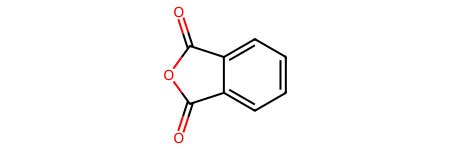

In [2]:
# 無水フタル酸
smiles = "O=C(OC(=O)c1cccc2)c12"
phthalic_anhydride = Chem.MolFromSmiles(smiles)
phthalic_anhydride

 ### Morgan フィンガープリントの取得
RDKitの`AllChem`モジュールに含まれている`GetMorganFingerprintAsBitVect`メソッドは、分子のMorganフィンガープリント（または円環フィンガープリント）を取得するためのメソッドで、引数にフィンガープリントの半径（デフォルト値は2）、およびビットベクトルのサイズ（デフォルト値は2048ビット）を指定します。  

下記の例は、無水フタル酸のMorganフィンガープリントを半径2、ビット数512として取得する方法です。

In [3]:
bi={}

fp =  AllChem.GetMorganFingerprintAsBitVect(phthalic_anhydride,
                                                    radius=2,
                                                    nBits = 512,
                                                    bitInfo = bi
                                               )

【解説】 **`GetMorganFingerprintAsBitVect()`** メソッド  

このメソッドは、RDKitのChemモジュールである`rdkit.Chem.AllChem`に含まれており、以下のように使用されます。

```python
from rdkit import Chem
from rdkit.Chem import AllChem

mol = Chem.MolFromSmiles('CCO')  # SMILES表記から分子を作成

# Morganフィンガープリントの取得
fp = AllChem.GetMorganFingerprintAsBitVect(mol, radius, nBits, bitinfo)
```

引数として指定する主なパラメータは次のとおりです：

- `mol`: RDKitの分子オブジェクト（RDKitの`Mol`型）。
- `radius`: フィンガープリントの半径（デフォルト値は2）。この値が大きいほど、より大域的な構造情報が含まれるフィンガープリントが生成されます。
- `nBits`: ビットベクトルのサイズ（デフォルト値は2048）。この値は生成されるフィンガープリントの次元数を表します。
- `bitinfo`: Morganフィンガープリントの特定のビットに寄与する原子についての情報を手に入れることができます。 この辞書型のデータには、フィンガープリントのビットセットごとに一つのエントリーが取り込まれており、 キー（key）はビットID、値（value）は（原子ID、半径）のタプルのリストとなっています。

メソッドの呼び出しにより、指定された半径とビット数のMorganフィンガープリントが取得されます。ビットベクトルは化学的な構造の特徴を表現し、各ビットは、特定の化学的な特徴（例：部分構造）の存在を示します。

### ビットベクトルのオンビットの確認
オンビット（1となったビット部位）は`GetOnBits()`メソッドより得ることができます。無水フタル酸のオンビットの数は512ビットのうち14ビットのみであることがわかります。

In [4]:
on_bits = list(fp.GetOnBits())
on_bits

[24, 64, 138, 144, 175, 214, 274, 314, 337, 352, 356, 439, 472, 480]

【解説】 **`GetOnBits()`** メソッドについて  

`GetOnBits()`メソッドは、フィンガープリント（例：Morganフィンガープリント）のビットベクトルにおいて、セットされている（1となっている）ビットのインデックスを返すメソッドです。

```python
from rdkit import Chem
from rdkit.Chem import AllChem

mol = Chem.MolFromSmiles('CCO')  # SMILES表記から分子を作成

# Morganフィンガープリントの取得
fp = AllChem.GetMorganFingerprintAsBitVect(mol, radius=2, nBits=2048)

# セットされているビットのインデックスを取得
on_bits = list(fp.GetOnBits())
print(on_bits)
```

`GetOnBits()`メソッドを呼び出すことで、セットされているビットのインデックスがリストとして返されます。このリストには、フィンガープリントのビットベクトルで1となっているビットの位置が含まれます。

### ビットベクトルの部分構造
biに含まれている部分構造を見てみましょう。次のリストの番号は（ビット番号、(原子ID、半径）、・・・）として出力されます。

In [5]:
list(bi.items())

[(24, ((2, 2),)),
 (64, ((3, 1), (7, 1), (8, 1), (1, 1))),
 (138, ((0, 0), (4, 0))),
 (144, ((2, 0),)),
 (175, ((7, 2), (8, 2))),
 (214, ((6, 1), (9, 1))),
 (274, ((2, 1),)),
 (314, ((0, 1), (4, 1))),
 (337, ((6, 0), (7, 0), (8, 0), (9, 0))),
 (352, ((5, 1), (10, 1))),
 (356, ((1, 0), (3, 0), (5, 0), (10, 0))),
 (439, ((3, 2), (1, 2))),
 (472, ((6, 2), (9, 2))),
 (480, ((5, 2), (10, 2)))]

無水フタル酸のビットの出力の原子IDについては、次のように配置されているようです。
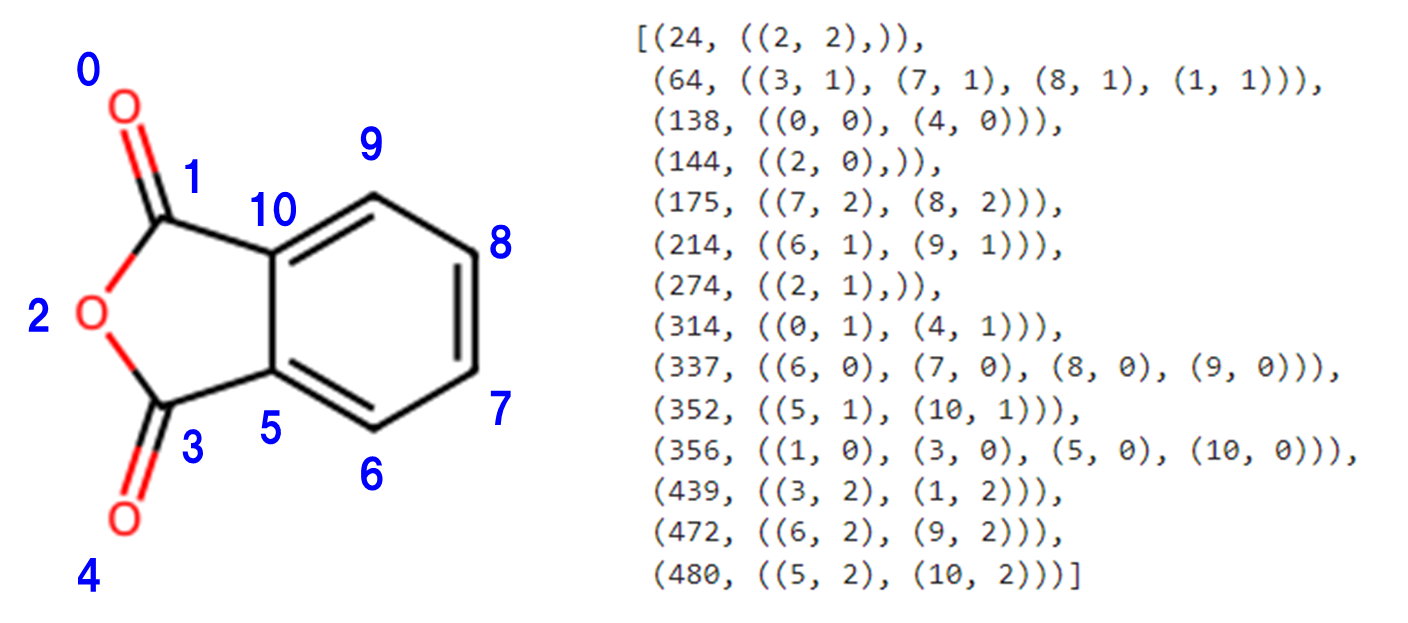

### Morganフィンガープリントを色付表示

上記のリスト配置では直観的にどの部分構造が何を表しているかを理解することが難しいですが、Drawモジュールの`DrawMorganBit`メソッドでは、ビットの部分構造を表示することができます。
次の例は24, ((2, 2),))と表記され無水フタル酸のbit ID = 24の部分構造を表示したものです。る原子ID=2のエーテル酸素を中心とした半径 = 2に及ぶ部分構造が示されています。

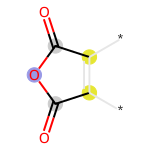

In [6]:
#底本の図1.6(a)相当
from rdkit.Chem import Draw

Draw.DrawMorganBit(phthalic_anhydride, 24, bi)

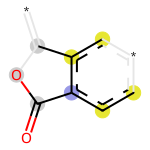

In [7]:
# 最後の480ビット目のビット情報
Draw.DrawMorganBit(phthalic_anhydride, 480,bi)

【解説】 **`DrawMorganBit()`** メソッドについて  

`DrawMorganBit`メソッドは指定されたMorganフィンガープリントを図として描画するための関数です。Morganビットは、図中でハイライトされた部分として表示され,そのフィンガープリントの特定のビットを視覚的に理解することができます。

Morganフィンガープリントの場合は、上記では青紫色の丸印は部分構造の中心原子を示し、黄色、および灰色の丸印は芳香環に含まれる原子、脂肪族に含まれる原子を示しています。

`DrawMorganBit`関数の基本的な構文は以下の通りです:

```python
from rdkit.Chem import Draw
Draw.DrawMorganBit(mol, bitId, bitInfo, **kwargs)
```

主な引数は次のとおりです:

- `mol`: RDKitのMolオブジェクト。Morganフィンガープリントを計算したい対象の分子を指定します。
- `bitId`: プロットしたい特定のMorganビットのIDを整数で指定します。
- `bitInfo`: Morganビットの情報を格納する辞書です。通常は `Chem.AllChem.GetMorganFingerprint()` メソッドを使用してMorganフィンガープリントを計算する際に得られた情報を渡します。

オプションの引数 `**kwargs` を使用して、図のサイズやカラーマップなどのプロットに関する詳細な設定をカスタマイズすることができます。

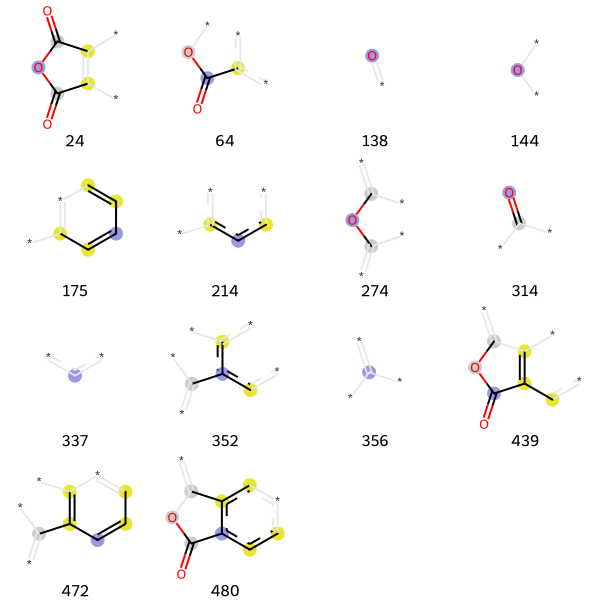

In [8]:
tpls = [(phthalic_anhydride,x,bi) for x in fp.GetOnBits()]

Draw.DrawMorganBits(tpls,
                    molsPerRow=4,
                    legends=[str(x) for x in fp.GetOnBits()]
                   )

### 部分構造の探し方
bitInfoに格納されている原子ID、半径から部分構造の環境を見つけるには`FindAtomEnvironmentOfRadiusN`メソッドを使って探すことができます。

In [9]:
# 原子ID、半径の指定
atom_id, radius = bi[24][0]
atom_id, radius

(2, 2)

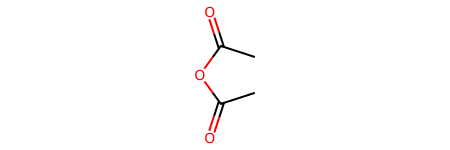

In [10]:
path_ids = Chem.FindAtomEnvironmentOfRadiusN(phthalic_anhydride, 
                                             radius, 
                                             atom_id
                                            )

substructure = Chem.PathToSubmol(phthalic_anhydride, 
                                 path_ids
                                )
substructure

【解説】 **`FindAtomEnvironmentOfRadiusN()`** メソッドについて  

`FindAtomEnvironmentOfRadiusN`メソッドは、特定の原子を中心として指定された半径の環境を見つけるために使用されます。この関数は、特定の原子の周囲に存在する原子のセットを取得することができます。この機能は、分子の特定の部分に対して特定の操作を行いたい場合に非常に便利です。

この関数の基本的な構文は以下の通りです:

```python
rdkit.Chem.FindAtomEnvironmentOfRadiusN(mol, radius, atomId, bondedOnly=True)
```

主な引数は次のとおりです:

- `mol`: RDKitのMolオブジェクト。環境を検索したい対象の分子を指定します。
- `radius`: int型。探索したい環境の半径を指定します。この半径の距離内にある原子が検索されます。
- `atomId`: int型。探索を開始する原子のインデックスを指定します。
- `bondedOnly`: bool型。Trueの場合、指定された半径内の原子は原子間の結合を持っている必要があります。Falseの場合、半径内のすべての原子が対象となります。

このメソッドは、与えられた原子を中心に、指定された半径内に存在する原子のインデックスのセットを返します。これにより、分子内の特定の部分構造を抽出することが可能です。環境の探索を行う際には、対象の原子が分子内で一意に特定される必要があります。

### Morganフィンガープリントが分子のどこを指しているかを確認する
`GetSubstructMatch()`で部分構造を指定することで分子全体の中での部分構造を表示することができます。

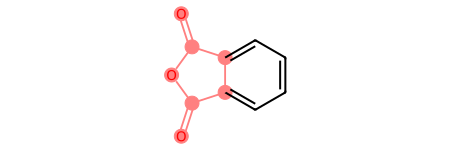

In [11]:
phthalic_anhydride.GetSubstructMatch(substructure)
phthalic_anhydride

【解説】 **`GetSubstructMatch()`** メソッド  
与えられた部分構造が、対象の分子内のどこに存在するかを見つけるために使用されます。具体的には、対象の分子に対して、指定された部分構造の一致性を見つけるために使用されます。

`GetSubstructMatch()`メソッドは、以下のように使用します：

```python
from rdkit import Chem

# ターゲット分子とサブストラクチャを生成
target_molecule = Chem.MolFromSmiles('CCOCCNC')
substructure = Chem.MolFromSmiles('CCO')

# ターゲット分子内でサブストラクチャが存在するかを検索
matches = target_molecule.GetSubstructMatch(substructure)

if matches:
    print("サブストラクチャが見つかりました。")
    print("マッチの位置: ", matches)
else:
    print("サブストラクチャは見つかりませんでした。")
```

この例では、`CCOCCNC`というSMILES表記のターゲット分子に対して、`CCO`というサブストラクチャ（部分構造）を検索しています。

`GetSubstructMatch()`メソッドは、ターゲット分子内にサブストラクチャが見つかった場合、サブストラクチャの開始原子のインデックスが格納されたPythonのリストを返します。このリストには、サブストラクチャの各原子がターゲット分子内のどの原子と対応しているかが示されています。

もしサブストラクチャが見つからなかった場合は、空のリストが返されます。

## 2.　RDKitフィンガープリント(Daylightフィンガープリント) (底本P.19)

**RDKitフィンガープリント**のアルゴリズムは**Daylightフィンガープリント**の生成で使われているものと類似しています。 分子のトポロジカルパス（たとえば結合）を同定しハッシュを生成します。それを利用してユーザー指定の長さのフィンガープリントにビットを立てます。 全てのパスを同定した後で、フィンガープリントは一般的に、特定のビット密度になるまで畳み込まれます。

https://rdkit.org/docs_jp/Getting_Started_with_RDKit_in_Python_jp.html

### RDKitフィンガープリントの呼び込み 
RDKitの`rdkit.Chem`モジュールに含まれている`RDKFingerprint`メソッドは、RDKitフィンガープリントを取得するためのメソッドです。

In [12]:
rdkbi = {}
rdkfp = Chem.RDKFingerprint(phthalic_anhydride, 
                            maxPath=2, 
                            bitInfo=rdkbi
                           )

【解説】 **`Chem.RDKFingerprint()`** 関数について  

RDKitフィンガープリント（RDKFingerprint）は、分子の特徴を取り込んだビット列であり、化学的な類似性の評価や機械学習モデルの入力として広く使用されています。`Chem.RDKFingerprint`はその分子の指定されたRDKitフィンガープリントを計算するために使用されます。

この関数の基本的な構文は以下の通りです:

```python
rdkit.Chem.RDKFingerprint(mol, 
                          minPath=1, 
                          maxPath=7, 
                          fpSize=2048, 
                          nBitsPerHash=2, 
                          useHs=True, 
                          tgtDensity=0.0, minSize=128, branchedPaths=True, useBondOrder=True, atomInvariants=[], fromAtoms=[], atomBits=[], bitInfo={}, setOnlyBits=False, branchedFingerprints=True, useChirality=True, useBondStereo=True, useFeatures=False)
```

主な引数は次のとおりです:

- `mol`: RDKitのMolオブジェクト。フィンガープリントを計算したい対象の分子を指定します。
- `minPath`と`maxPath`: int型。計算されるフィンガープリントに含まれる原子間の結合のパスの最小および最大長を指定します。デフォルトでは、最小パスは1（直接結合）、最大パスは7となっています。
- `fpSize`: int型。生成されるフィンガープリントのサイズ（ビット数）を指定します。デフォルトでは2048ビットです。
- `nBitsPerHash`: int型。各パスに対して計算されるハッシュの数を指定します。デフォルトでは2です。
- `useHs`: bool型。Trueの場合、水素原子を含むフィンガープリントを生成します。Falseの場合、水素原子は含まれません。
- その他の引数には、フィンガープリントの計算に関連するさまざまな設定が含まれていますが、通常の使用ではこれらをデフォルト値のままにしておくことが一般的です。

### ビットベクトルの部分構造
このコードでは、与えられたSMILES表記の分子に対してRDKFingerprint（フィンガープリント）を計算し、そのビット列を表示しています。

In [13]:
list(rdkfp.GetOnBits())

[70,
 277,
 294,
 330,
 562,
 744,
 766,
 842,
 929,
 930,
 1026,
 1049,
 1060,
 1075,
 1339,
 1363,
 1907,
 1909,
 1941,
 1960]

In [14]:
from pprint import pprint 
pprint(list(rdkbi.items()))

[(70, [[0, 9], [3, 4]]),
 (277, [[1, 9], [2, 4]]),
 (294, [[5, 6], [5, 10], [6, 7], [7, 8], [8, 11], [10, 11]]),
 (330, [[5, 6], [5, 10], [6, 7], [7, 8], [8, 11], [10, 11]]),
 (562, [[1], [2]]),
 (744, [[4, 10], [4, 5], [9, 11], [9, 10]]),
 (766, [[0, 1], [2, 3]]),
 (842, [[5], [6], [7], [8], [10], [11]]),
 (929, [[0, 1], [2, 3]]),
 (930, [[4], [9]]),
 (1026, [[5], [6], [7], [8], [10], [11]]),
 (1049, [[0, 9], [3, 4]]),
 (1060, [[4], [9]]),
 (1075, [[0], [3]]),
 (1339, [[1], [2]]),
 (1363, [[1, 9], [2, 4]]),
 (1907, [[0], [3]]),
 (1909, [[4, 10], [4, 5], [9, 11], [9, 10]]),
 (1941, [[1, 2]]),
 (1960, [[1, 2]])]


### RDKitフィンガープリントの可視化
フィンガープリントは数字列のみでは理解が及びません。RDKitの`Draw.DrawRDKitBit()`メソッドを使うことで部分構造を可視化し、フィンガープリントを解析することができます。また、特定のビットの分子における存在を直感的に理解ができるようになります。なお、黄色の丸印は芳香環の原子を示しています。

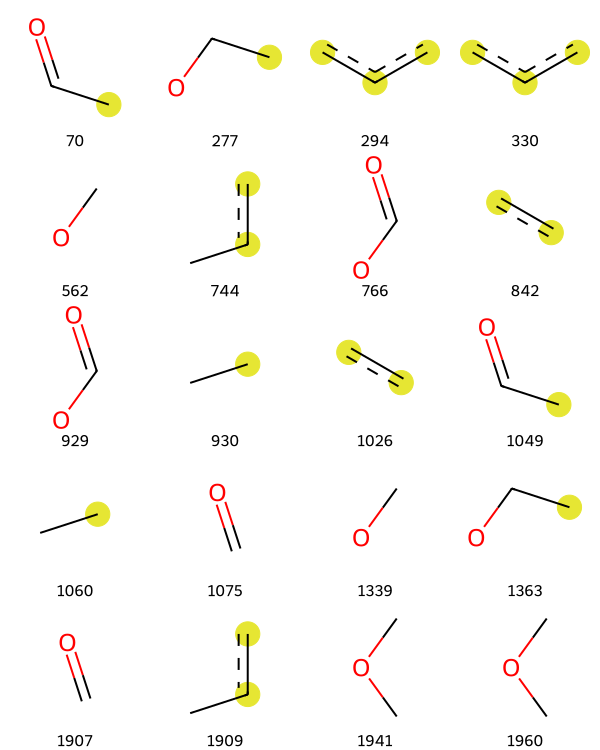

In [15]:
tpls = [(phthalic_anhydride,x,rdkbi) for x in rdkbi]

Draw.DrawRDKitBits(tpls,
                   molsPerRow=4,
                   legends=[str(x) for x in rdkbi]
                  )

【解説】 **`Draw.DrawRDKitBit()`** メソッドについて  
フィンガープリントやビットマスクを可視化するために使用されます。フィンガープリントは、分子の特徴を捉えたバイナリベクトルであり、化学的な性質を表現するのに便利です。`Draw.DrawRDKitBit()`メソッドを使用することで、フィンガープリントのビットがセットされているかどうかをグラフィカルに表示できます。

このメソッドの一般的な構文は以下のようになります:

```python
from rdkit.Chem import Draw
from rdkit import DataStructs

# フィンガープリントを取得する
fingerprint = ...  # RDKitのフィンガープリント (ExplicitBitVectなど)

# ビットマスクがセットされているかをグラフィカルに表示
img = Draw.DrawRDKitBit(fingerprint, bitId, **kwargs)
```

ここでの主な引数は以下の通りです:

- `fingerprint`: RDKitのフィンガープリント (ExplicitBitVectなど) を指定します。

- `bitId`: グラフィカルに表示するビットマスクのIDを指定します。

- `**kwargs`: その他のオプション引数を指定します。例えば、`legend`を設定することでビットマスクの説明を表示できます。

以下は、簡単な例を示します:

```python
from rdkit.Chem import Draw
from rdkit.Chem import AllChem

# 分子を読み込む
mol = Chem.MolFromSmiles('CCO')

# フィンガープリントを計算する
fingerprint = AllChem.GetMorganFingerprintAsBitVect(mol, 2, nBits=1024)

# ビットマスクがセットされているかをグラフィカルに表示
img = Draw.DrawRDKitBit(fingerprint, bitId=100)
img.show()
```

この例では、`CCO`というSMILES表記の分子からモルガンフィンガープリントを計算し、ビットマスク100のビットがセットされているかをグラフィカルに表示しています。

## 3.RDKit記述子（底本P.11）

RDKitの`Descriptors`クラスは、化学的な分子の特性や記述子を計算するためのクラスです。このクラスは、RDKitライブラリの一部であり、分子の物理的、化学的、構造的な特性を数値で表現するための関数を提供します。以下にいくつかの代表的なRDKit記述子の一部を示します：

1. **溶解度関連**：
   - LogP（分配係数）:  水分配係数で分子の疎水性を表す指標です。
   - TPSA（極性表面積）: 分子の極性を表す表面積の指標です。
   - MR（分子量の相対値）: 分子のサイズと形状を表す指標です。
   
2. **三次元形状関連**：
   - 2D/3D相互情報量: 分子内の原子間距離と角度の統計的な特徴を表す指標です。
   - 融合リング数: 分子内の融合環の数を表す指標です。
   
3. **環境依存性関連**：
   - 融合環間距離: 分子内の融合環の間の距離を表す指標です。
   - 局所原子密度: 分子内の原子の密度を表す指標です。
   
4. **構造関連記**：
   - 分子量: 分子の質量を表す指標です。
   - HBA（水素結合アクセプター）: 分子内の水素結合アクセプターの数を表す指標です。
   - HBD（水素結合ドナー）: 分子内の水素結合ドナーの数を表す指標です。

### RDKitフィンガープリントとRDKit記述子の違い
RDKitフィンガープリントとRDKit記述子は異なる概念です。両者は共通点もありますが、目的や計算方法、得られる情報などに以下の違いがあります。

* **RDKit fingerprint（フィンガープリント）**:
   - RDKit fingerprintは、分子の構造に基づいて生成されるバイナリのビット列です。
   - 化学的特徴を取り込んだコンパクトな表現であり、主に分子の類似性評価や機械学習モデルの特徴量として使用されます。
   - 分子の特定の部分構造の存在を表すビットが立っていることで、その分子がその部分構造を持つかどうかを示します。

* **RDKit descriptor（ディスクリプタ）**:
   - RDKit descriptorは、分子の特定の性質や特徴を数値として表す量です。
   - 分子の物理的、化学的、トポロジカルな性質などが計算されます。
   - 主に分子の特性を定量的に理解したり、機械学習モデルの特徴量として使用されたりします。
   - 分子のサイズ、重さ、水素結合ドナーおよびアクセプターの数、融点、沸点、極性などが含まれます。


RDKit fingerprintは分子の特定の部分構造の存在を示すバイナリ表現であり、主に化学的類似性の評価に使用されます。一方、RDKit descriptorは分子の物理的、化学的、およびトポロジカルな性質を定量化した数値であり、主に分子の特性の解析や機械学習モデルの特徴量として使用されます。どちらもRDKitライブラリの重要な機能であり、分子の解析や予測に幅広く利用されています。

### モジュールインポート  
RDKit記述子は`rdkit.Chem.Descriptors`モジュールから読み出せます。その中にある`descList`メソッドは、RDKit記述子のリストを含んでおり、分子量やフラグメントなどの208の項目（情報）を提供します。

In [16]:
from rdkit.Chem import Descriptors
len(Descriptors.descList)

208

### 記述子の種類

In [17]:
names = list(dict(Descriptors.descList).keys())
names

['MaxEStateIndex',
 'MinEStateIndex',
 'MaxAbsEStateIndex',
 'MinAbsEStateIndex',
 'qed',
 'MolWt',
 'HeavyAtomMolWt',
 'ExactMolWt',
 'NumValenceElectrons',
 'NumRadicalElectrons',
 'MaxPartialCharge',
 'MinPartialCharge',
 'MaxAbsPartialCharge',
 'MinAbsPartialCharge',
 'FpDensityMorgan1',
 'FpDensityMorgan2',
 'FpDensityMorgan3',
 'BCUT2D_MWHI',
 'BCUT2D_MWLOW',
 'BCUT2D_CHGHI',
 'BCUT2D_CHGLO',
 'BCUT2D_LOGPHI',
 'BCUT2D_LOGPLOW',
 'BCUT2D_MRHI',
 'BCUT2D_MRLOW',
 'BalabanJ',
 'BertzCT',
 'Chi0',
 'Chi0n',
 'Chi0v',
 'Chi1',
 'Chi1n',
 'Chi1v',
 'Chi2n',
 'Chi2v',
 'Chi3n',
 'Chi3v',
 'Chi4n',
 'Chi4v',
 'HallKierAlpha',
 'Ipc',
 'Kappa1',
 'Kappa2',
 'Kappa3',
 'LabuteASA',
 'PEOE_VSA1',
 'PEOE_VSA10',
 'PEOE_VSA11',
 'PEOE_VSA12',
 'PEOE_VSA13',
 'PEOE_VSA14',
 'PEOE_VSA2',
 'PEOE_VSA3',
 'PEOE_VSA4',
 'PEOE_VSA5',
 'PEOE_VSA6',
 'PEOE_VSA7',
 'PEOE_VSA8',
 'PEOE_VSA9',
 'SMR_VSA1',
 'SMR_VSA10',
 'SMR_VSA2',
 'SMR_VSA3',
 'SMR_VSA4',
 'SMR_VSA5',
 'SMR_VSA6',
 'SMR_VSA7',
 'SMR_

### 化学情報の読み込み

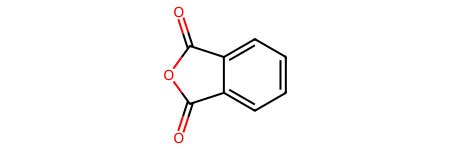

In [18]:
smiles = "O=C(OC(=O)c1cccc2)c12"

phthalic_anhydride = Chem.MolFromSmiles(smiles)
phthalic_anhydride

### 値（value）の呼び出し
descListにある項目はpythonのメソッドとなっています。引数としてmolオブジェクトを加えることで記述子のvalueが返されます。次の３つ例は分子量、TPSA、回転可能な結合数を読み出しています。

In [19]:
#分子量の読み出し
mol_weight = Descriptors.MolWt(phthalic_anhydride)
print("Molecular weight:", mol_weight)

Molecular weight: 148.11699999999996


In [20]:
tpsa = Descriptors.TPSA(phthalic_anhydride)
num_rotatable_bonds = Descriptors.NumRotatableBonds(phthalic_anhydride)


print("TPSA:", tpsa)
print("Number of rotatable bonds:", num_rotatable_bonds)

TPSA: 43.370000000000005
Number of rotatable bonds: 0


### 全記述子の値の呼び出し

In [21]:
def getMolDescriptors(mol, missingVal=None):
    ''' calculate the full list of descriptors for a molecule
    
        missingVal is used if the descriptor cannot be calculated
    '''
    res = {}
    for nm,fn in Descriptors._descList:
        # some of the descriptor fucntions can throw errors if they fail, catch those here:
        try:
            val = fn(mol)
        except:
            # print the error message:
            import traceback
            traceback.print_exc()
            # and set the descriptor value to whatever missingVal is
            val = missingVal
        res[nm] = val
    return res

In [22]:
getMolDescriptors(phthalic_anhydride)

{'MaxEStateIndex': 10.83287037037037,
 'MinEStateIndex': -0.5503703703703706,
 'MaxAbsEStateIndex': 10.83287037037037,
 'MinAbsEStateIndex': 0.3587962962962967,
 'qed': 0.40682134573792267,
 'MolWt': 148.11699999999996,
 'HeavyAtomMolWt': 144.08499999999998,
 'ExactMolWt': 148.01604398799998,
 'NumValenceElectrons': 54,
 'NumRadicalElectrons': 0,
 'MaxPartialCharge': 0.34640400416765926,
 'MinPartialCharge': -0.385656968792507,
 'MaxAbsPartialCharge': 0.385656968792507,
 'MinAbsPartialCharge': 0.34640400416765926,
 'FpDensityMorgan1': 0.9090909090909091,
 'FpDensityMorgan2': 1.3636363636363635,
 'FpDensityMorgan3': 1.8181818181818181,
 'BCUT2D_MWHI': 16.583527533622934,
 'BCUT2D_MWLOW': 10.119205015064276,
 'BCUT2D_CHGHI': 2.277168330707175,
 'BCUT2D_CHGLO': -1.8572692351146736,
 'BCUT2D_LOGPHI': 2.1773371743423433,
 'BCUT2D_LOGPLOW': -1.963070774960751,
 'BCUT2D_MRHI': 6.140682042811686,
 'BCUT2D_MRLOW': 0.04435876006121083,
 'BalabanJ': 2.6946772551637395,
 'BertzCT': 307.94533670670

## 4. 探索的データ解析　（P.11）
ここでは「data/delaney-solubility」フォルダーにあるdelaney-processed.csvをpandasの`read_csv()`からデータフレーム（DataFrame）オブジェクトとして変数dfに格納します。dfは1128化合物に対して10の特徴量からなるデータ行列となっていることが確かめられます。

In [23]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [24]:
df = pd.read_csv('./data/dataset/delaney-processed.csv')
df['mol']=df['smiles'].apply(Chem.MolFromSmiles)
df

,Compound ID,ESOL predicted log solubility in mols per litre,Minimum Degree,Molecular Weight,Number of H-Bond Donors,Number of Rings,Number of Rotatable Bonds,Polar Surface Area,measured log solubility in mols per litre,smiles,mol
0,Amigdalin,-0.974,1,457.432,7,3,7,202.32,-0.770,OCC3OC(OCC2OC(OC(C#N)c1ccccc1)C(O)C(O)C2O)C(O)...,<rdkit.Chem.rdchem.Mol object at 0x00000263B79...
1,Fenfuram,-2.885,1,201.225,1,2,2,42.24,-3.300,Cc1occc1C(=O)Nc2ccccc2,<rdkit.Chem.rdchem.Mol object at 0x00000263B79...
2,citral,-2.579,1,152.237,0,0,4,17.07,-2.060,CC(C)=CCCC(C)=CC(=O),<rdkit.Chem.rdchem.Mol object at 0x00000263B79...
3,Picene,-6.618,2,278.354,0,5,0,0.00,-7.870,c1ccc2c(c1)ccc3c2ccc4c5ccccc5ccc43,<rdkit.Chem.rdchem.Mol object at 0x00000263B79...
4,Thiophene,-2.232,2,84.143,0,1,0,0.00,-1.330,c1ccsc1,<rdkit.Chem.rdchem.Mol object at 0x00000263B79...
...,...,...,...,...,...,...,...,...,...,...,...
1123,halothane,-2.608,1,197.381,0,0,0,0.00,-1.710,FC(F)(F)C(Cl)Br,<rdkit.Chem.rdchem.Mol object at 0x00000263B7A...
1124,Oxamyl,-0.908,1,219.266,1,0,1,71.00,0.106,CNC(=O)ON=C(SC)C(=O)N(C)C,<rdkit.Chem.rdchem.Mol object at 0x00000263B7A...
1125,Thiometon,-3.323,1,246.359,0,0,7,18.46,-3.091,CCSCCSP(=S)(OC)OC,<rdkit.Chem.rdchem.Mol object at 0x00000263B7A...
1126,2-Methylbutane,-2.245,1,72.151,0,0,1,0.00,-3.180,CCC(C)C,<rdkit.Chem.rdchem.Mol object at 0x00000263B7A...


### RDKit記述子
RDKit記述子の`descList`メソッドより、分子量やフラグメントなどの208の項目（情報）についてみてみることにしましょう。

In [25]:
from rdkit.Chem.Descriptors import descList

In [26]:
# 化合物IDの最初のアミグダリンについての記述子とその値
mol = df['mol'][0]

for descriptor in descList:
    value = descriptor[1](mol)
    print(descriptor[0], value)

MaxEStateIndex 10.253328884035504
MinEStateIndex -1.7016049382716056
MaxAbsEStateIndex 10.253328884035504
MinAbsEStateIndex 0.48660209297610146
qed 0.21751778620947723
MolWt 457.4320000000001
HeavyAtomMolWt 430.21600000000024
ExactMolWt 457.1584106839999
NumValenceElectrons 178
NumRadicalElectrons 0
MaxPartialCharge 0.1882658561787514
MinPartialCharge -0.3935665150995826
MaxAbsPartialCharge 0.3935665150995826
MinAbsPartialCharge 0.1882658561787514
FpDensityMorgan1 0.8125
FpDensityMorgan2 1.375
FpDensityMorgan3 1.96875
BCUT2D_MWHI 16.732837958750792
BCUT2D_MWLOW 9.98056032659302
BCUT2D_CHGHI 2.4752382296424558
BCUT2D_CHGLO -2.425091864223853
BCUT2D_LOGPHI 2.284935450528444
BCUT2D_LOGPLOW -2.613925609105604
BCUT2D_MRHI 5.2166929007512515
BCUT2D_MRLOW -0.33372920506026804
BalabanJ 1.6549374848621088
BertzCT 759.6629378441625
Chi0 23.413484604514085
Chi0n 16.862519795262227
Chi0v 16.862519795262227
Chi1 15.277294663077214
Chi1n 9.998815978920186
Chi1v 9.998815978920186
Chi2n 7.601218129882

### 1128化合物の記述子の計算
辞書型の`values()`関数を使ってキーに格納されている値をdescValues変数（オブジェクト）に配置します。

In [27]:
# ディスクリプタ（記述子）の値についてのオブジェクト
descValues = dict(descList).values()

In [28]:
# 結果を格納するリストを初期化する
fng_val = []

# ラムダ関数を定義する
lambda_func = lambda f: f(m)

# リストの各要素に対して処理を行う
for m in df['mol']:
    #  DataFrameの列'mol'の各要素に対して繰り返す
    #  ラムダ関数を適用し、結果をリストに追加する
    result = list(map(lambda_func, descValues))
    fng_val.append(result)

In [29]:
# 1128化合物×209個のarray
#fng_val

辞書型の`key()`関数を使ってキー名（メタデータ）をnames変数（オブジェクト）に配置します。これは、次のデータフレーム形式で表示するときの列ラベルに使います。

In [30]:
# ディスクリプタ（記述子）の一覧 209個の内容
descNames = list(dict(descList).keys())

In [31]:
# 1128化合物×209個のpandasのdataframe変換
df_rdkit = pd.DataFrame(fng_val, columns=descNames)
df_rdkit

,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,NumRadicalElectrons,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,10.253329,-1.701605,10.253329,0.486602,0.217518,457.432,430.216,457.158411,178,0,...,0,0,0,0,0,0,0,0,0,0
1,11.724911,-0.145880,11.724911,0.145880,0.811283,201.225,190.137,201.078979,76,0,...,0,0,0,0,0,0,0,0,0,0
2,10.020498,0.845090,10.020498,0.845090,0.343706,152.237,136.109,152.120115,62,0,...,0,0,0,0,0,0,0,0,0,0
3,2.270278,1.301055,2.270278,1.301055,0.291526,278.354,264.242,278.109550,102,0,...,0,0,0,0,0,0,0,0,0,0
4,2.041667,1.712963,2.041667,1.712963,0.448927,84.143,80.111,84.003371,26,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1123,10.999421,-4.317901,10.999421,1.916667,0.523506,197.381,196.373,195.890224,44,0,...,0,0,0,0,0,0,0,0,0,0
1124,11.337508,-0.705457,11.337508,0.123704,0.293876,219.266,206.162,219.067762,80,0,...,1,0,0,0,0,0,0,0,0,0
1125,5.174287,-1.984662,5.174287,1.011373,0.506070,246.359,231.239,245.997179,74,0,...,1,0,0,0,0,0,0,0,2,0
1126,2.222222,0.884259,2.222222,0.884259,0.444441,72.151,60.055,72.093900,32,0,...,0,0,0,0,0,0,0,0,0,0


このようにSMILES情報があればRDKitでmolオブジェクト化させ、機械学習で必要となる特徴量を記述子から簡単に生成することができます。

### 記述子のEDA
底本の【1.2 数値データ可視化　探索的データ解析】にあるコードを使って記述子の可視化を行ってみましょう。ここでは分散が0の記述子は排除し、値が100以下の正値の条件で合致するものの中で10個の記述子の散布図をプロットします。なお、pandasでは分散値は`var()`メソッドで得ることができます。

In [32]:
# 分散値が100以下の正値の条件
is_selected = np.logical_and(df_rdkit.var()>0, df_rdkit.var() <= 100)
count = np.sum(is_selected)
count

161

【解説】 **`np.logical_and()`** メソッド  
NumPyの関数であり、要素ごとの論理積（AND）演算を実行します。この関数は、2つの論理配列（ブール型配列）の要素ごとに AND 演算を行い、結果の論理配列を返します。

以下は、`np.logical_and`の使用例です。

```python
import numpy as np

arr1 = np.array([True, True, False, False])
arr2 = np.array([True, False, True, False])

result = np.logical_and(arr1, arr2)
print(result)
```

出力:
```
[ True False False False]
```

* この例では、`arr1`と`arr2`という2つの論理配列を作成し、`np.logical_and`関数を使用して要素ごとの AND 演算を行っています。結果として得られる論理配列は、要素ごとに対応する位置で AND 演算が行われた結果です。

* `np.logical_and`は、ブール型配列を用いた要素ごとの論理演算が必要な場合に便利です。例えば、条件を満たす要素のフィルタリング、配列の要素同士の関係の判定などに使用することができます。

In [33]:
#　上位10の記述子をTARGET変数化する。
TARGET = is_selected.keys().tolist()[:10]

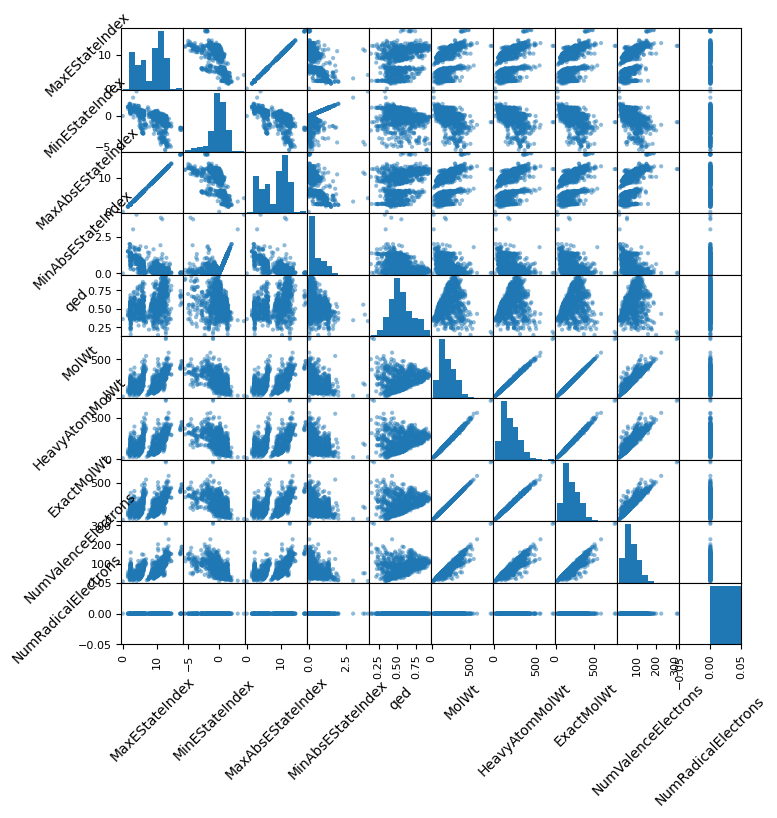

In [34]:
# 図1.1 (a)の作図
from pandas.plotting import scatter_matrix

sm = scatter_matrix(df_rdkit[TARGET], figsize=(8,8))

[s.xaxis.label.set_rotation(45) for s in sm.reshape(-1)]
[s.yaxis.label.set_rotation(45) for s in sm.reshape(-1)]

plt.savefig('./results/eda/rdkit_scatter_mat.png')
plt.show()

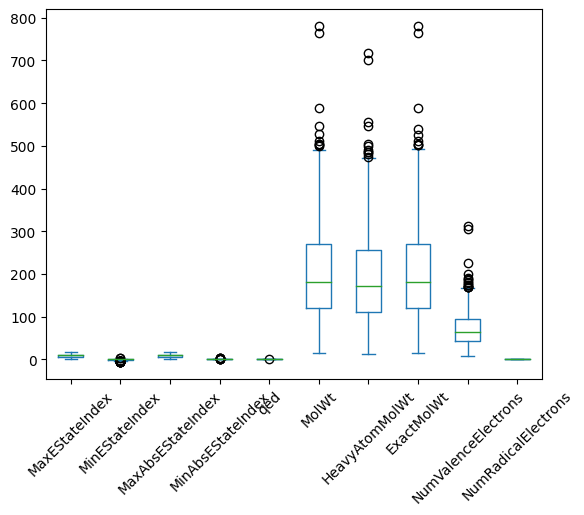

In [35]:
# 図1.1 (b)の作図
df_rdkit[TARGET].plot.box(rot=45)
plt.savefig('./results/eda/rdkit_box.png')

### 【参考】RDKit記述子（フラグメント情報）

descListに含まれているFingerPrintのうち、接頭に'fr_'がつく特徴量は、RDKitの指紋（Fingerprint）ベースの分子記述子です。これらの特徴量は、分子の構造や化学的性質に関する情報を提供します。接頭に'fr_'を含む特徴量のみをリスト化してみることにしましょう。以下に、'fr_'で始まる特徴量の意味となります。

1. `fr_CrippenO`: 分子のCrippenの酸性パラメーター（oxygen）を表す。
2. `fr_CrippenN`: 分子のCrippenの酸性パラメーター（nitrogen）を表す。
3. `fr_CrippenC`: 分子のCrippenの酸性パラメーター（carbon）を表す。
4. `fr_CrippenP`: 分子のCrippenの酸性パラメーター（phosphorus）を表す。
5. `fr_CrippenF`: 分子のCrippenの酸性パラメーター（fluorine）を表す。
6. `fr_CrippenCl`: 分子のCrippenの酸性パラメーター（chlorine）を表す。
7. `fr_CrippenBr`: 分子のCrippenの酸性パラメーター（bromine）を表す。
8. `fr_CrippenI`: 分子のCrippenの酸性パラメーター（iodine）を表す。
9. `fr_Al_COO`: アルコール基とカルボン酸基の結合パターンを表す。
10. `fr_Al_OH`: アルコール基の数を表す。
11. `fr_Al_OH_noTert`: 三次アルコール以外のアルコール基の数を表す。
12. `fr_ArN`: アリールアミン基の数を表す。
13. `fr_Ar_COO`: アリールカルボン酸基の数を表す。
14. `fr_Ar_N`: アリールアミンまたはアリールアミド基の数を表す。
15. `fr_Ar_NH`: アリールアミンまたはアリールアミドまたはアリールアミンオキシド基の数を表す。
16. `fr_Ar_OH`: アリールアルコール基の数を表す。
17. `fr_COO`: カルボン酸基の数を表す。
18. `fr_COO2`: 二重カルボン酸基の数を表す。
19. `fr_C_O`: カルボニル基の数を表す。
20. `fr_C_O_noCOO`: カルボニル基（カルボン酸基を除く）の数を表す。
21. `fr_C_S`: カルボニル硫黄結合の数を表す。
22. `fr_HBA`: 水素結合アクセプター（HBA: Hydrogen Bond Acceptor）の数を表す。
23. `fr_HBA1`: 水素結合アクセプター（1位）の数を表す。
24. `fr_HBA2`: 水素結合アクセプター（2位）の数を表す。
25. `fr_HBA3`: 水素結合アクセプター（3位）の数を表す。
26. `fr_HBD`: 水素結合ドナー（HBD: Hydrogen Bond Donor）の数を表す。
27. `fr_HBD1`: 水素結合ドナー（1位）の数を表す。
28. `fr_HBD2`: 水素結合ドナー（2位）の数を表す。
29. `fr_HBD3`: 水素結合ドナー（3位）の数を表す。
30. `fr_Imine`: イミン基の数を表す。
31. `fr_Imine_no10`: イミン基（位が10以外）の数を表す。
32. `fr_NH0`: 窒素の水素結合ドナー（位が0）の数を表す。
33. `fr_NH1`: 窒素の水素結合ドナー（位が1）の数を表す。
34. `fr_NH2`: 窒素の水素結合ドナー（位が2）の数を表す。
35. `fr_N_O`: 窒素酸化物基（NO, NO2）の数を表す。
36. `fr_Ndealkylation1`: アルキル置換された窒素の除去（位が1）の数を表す。
37. `fr_Ndealkylation2`: アルキル置換された窒素の除去（位が2）の数を表す。
38. `fr_Nhpyrrole`: ピロール窒素の水素の数を表す。
39. `fr_SH`: チオール基の数を表す。
40. `fr_aldehyde`: アルデヒド基の数を表す。
41. `fr_alkyl_carbamate`: アルキルカルバメート基の数を表す。
42. `fr_alkyl_halide`: アルキルハロゲン化物基の数を表す。
43. `fr_allylic_oxid`: アリル置換の酸化基の数を表す。
44. `fr_amide`: アミド基の数を表す。
45. `fr_amidine`: アミジン基の数を表す。
46. `fr_aniline`: アニリン基の数を表す。
47. `fr_aryl_methyl`: アリールメチル基の数を表す。
48. `fr_azide`: アジ化物基の数を表す。
49. `fr_azo`: アゾ基の数を表す。
50. `fr_barbitur`: バルビツール基の数を表す。
51. `fr_benzene`: ベンゼン環の数を表す。
52. `fr_benzodiazepine`: ベンゾジアゼピン基の数を表す。
53. `fr_bicyclic`: 二環式化合物の数を表す。
54. `fr_diazo`: ジアゾ基の数を表す。
55. `fr_dihydropyridine`: ジヒドロピリジン基の数を表す。
56. `fr_epoxide`: エポキシ基の数を表す。
57. `fr_ester`: エステル基の数を表す。
58. `fr_ether`: エーテル基の数を表す。
59. `fr_furan`: フラン基の数を表す。
60. `fr_guanido`: グアニジン基の数を表す。
61. `fr_halogen`: ハロゲン基の数を表す。
62. `fr_hdrzine`: ヒドラジン基の数を表す。
63. `fr_hdrzone`: ヒドラゾン基の数を表す。
64. `fr_imidazole`: イミダゾール基の数を表す。
65. `fr_imide`: イミド基の数を表す。
66. `fr_isocyan`: イソシアン基の数を表す。
67. `fr_isothiocyan`: イソチオシアン基の数を表す。
68. `fr_ketone`: ケトン基の数を表す。
69. `fr_ketone_Topliss`: ケトン基（Topliss分類法）の数を表す。
70. `fr_lactam`: ラクタム基の数を表す。
71. `fr_lactone`: ラクトン基の数を表す。
72. `fr_methoxy`: メトキシ基の数を表す。
73. `fr_morpholine`: モルホリン基の数を表す。
74. `fr_nitrile`: ニトリル基の数を表す。
75. `fr_nitro`: ニトロ基の数を表す。
76. `fr_nitro_arom`: 芳香族ニトロ基の数を表す。
77. `fr_nitro_arom_nonortho`: 直鎖または1位に位置しない芳香族ニトロ基の数を表す。
78. `fr_nitroso`: ニトロソ基の数を表す。
79. `fr_oxazole`: オキサゾール基の数を表す。
80. `fr_oxime`: オキシム基の数を表す。
81. `fr_para_hydroxylation`: パラ位置のヒドロキシ基の数を表す。
82. `fr_phenol`: フェノール基の数を表す。
83. `fr_phenol_noOrthoHbond`: オルト位に水素結合を形成しないフェノール基の数を表す。
84. `fr_phos_acid`: リン酸基の数を表す。
85. `fr_phos_ester`: リン酸エステル基の数を表す。
86. `fr_piperdine`: ピペリジン基の数を表す。
87. `fr_piperzine`: ピペラジン基の数を表す。
88. `fr_priamide`: プライマイド基の数を表す。
89. `fr_prisulfonamd`: プリスルホンアミド基の数を表す。
90. `fr_pyridine`: ピリジン基の数を表す。
91. `fr_quatN`: クォーターナリー窒素基の数を表す。
92. `fr_sulfide`: スルフィド基の数を表す。
93. `fr_sulfonamd`: スルホンアミド基の数を表す。
94. `fr_sulfone`: スルホン基の数を表す。
95. `fr_term_acetylene`: 端基のアセチレン基の数を表す。
96. `fr_tetrazole`: テトラゾール基の数を表す。
97. `fr_thiazole`: チアゾール基の数を表す。
98. `fr_thiocyan`: チオシアン基の数を表す。
99. `fr_thiophene`: チオフェン基の数を表す。
100. `fr_unbrch_alkane`: 非枝分かれアルカン基の数を表す。
101. `fr_urea`: ウレア基の数を表す。